### Resoluciòn sistema (I-A)x = d 

In [36]:
"""
Implementacion del metodo LU
"""

import numpy as np
import scipy.linalg as sl


# retorna el primer indice del elemento mayor(si hubiera dos mayores)
def max_index(x):   
    element_max = max(x)
    index = [k for k in range(len(x)) if x[k] == element_max]
    return index[0]

# cambia la fila k por la fila j en A
def change_row(A, k, j):
    row_aux = A[k,]
    A[k,] = A[j,]
    A[j,] = row_aux
    
    return A
# compruba si A tiene una descomposicion LU
def fact_lu(A):
    nrow = np.shape(A)[0]
    return np.alltrue([sl.det(A[:k+1,:k+1]) > 0 for k in range(nrow-1)])

    
# resuelve el sistema Ax = b, con A matriz triangular inferior

# depurar, 
"""
def solve_trinf(A, b):
    nrow = np.shape(A)[0]
    x = np.zeros(nrow).reshape(nrow, 1)
    for k in range(nrow):
        if k == 1:
            x[1] = (b[1]-A[1,0]*x[0,0])/A[1,1]
        x[k] = (b[k]-np.inner(A[k,:k-1], x[:k-1,0]))/A[k,k]
    return x

"""


# resuelve el sistema Ax = b, con A matriz triangular superior

#depurar
"""
def solve_trisup(A, b):
    nrow = np.shape(A)[0]
    x = np.zeros(nrow).reshape(nrow,1)
    for k in range(nrow-1,-1,-1):
        x[k] = (b[k]-np.inner(A[k,k+1:], x[k+1:,0]))/A[k,k]
    
    return x
"""

#retorna la factorizacion LU de A 
def lu(A):
    if fact_lu(A):
        nrow = np.shape(A)[0]
        invL = np.identity(nrow)
        U = A
        P = np.identity(nrow)
        for k in range(nrow):
            index = max_index(U[k:,k])+k
            # crea P (matrix de permutacion), iteracion k
            Pk = change_row(np.identity(nrow), k, index)
            P = np.dot(Pk, P)
            # crea L (elimina elementos en la fila k), iteracion k
            a = np.zeros(nrow).reshape(nrow, 1)
            a[k+1:,0] = U[k+1:,k]/U[k,k]
            e = np.zeros(nrow).reshape(1, nrow)
            e[0,k] = 1
            Lk = np.identity(nrow) - np.dot(a, e)
            LPk = np.dot(Lk,Pk)
            U = np.dot(LPk, U)
            invL = np.dot(LPk, invL)

        L = np.dot(P, sl.inv(invL)) #calcula la inversa de una matriz triangular (invL)

        return L, U
    else:
        print("La matriz no posee una factorizacion lu.")
        return np.zeros_like(A), np.zeros_like(A)
    



# resuelve el sistema LUx = b
def solvelu(A, b):
    if fact_lu(A):
        nrow = np.shape(A)[0]
        L, U = lu(A)
        z = sl.solve(L, b) # resuelve el sistema Lz = b, donde z = Ux y L es triangular inferior
        #ver porque no funciona solve_trisup(U, z)
        x = sl.solve(U, z)  # resuelve el sistema Ux = z,  donde U es triangular superior

        return x
    else:
        print("La matriz no tiene un descomposicion LU.")
        return np.zeros_like(b)

In [38]:
"""
Implementacion del metodo de eliminacion gaussiana con pivoteo
"""

import numpy as np
import scipy.linalg as sl

# retorna el primer indice del elemento mayor(si hubiera dos mayores)
def max_index(x):   
    element_max = max(x)
    index = [k for k in range(len(x)) if x[k] == element_max]
    return index[0]

# cambia la fila k por la fila j en A
def change_row(A, k, j):
    row_aux = A[k,]
    A[k,] = A[j,]
    A[j,] = row_aux
    
    return A

# depurar
"""
def solve_trisup(A, b):
    nrow = np.shape(A)[0]
    x = np.zeros(nrow).reshape(nrow,1)
    for k in range(nrow-1,-1,-1):
        x[k,0] = (b[k,0]-np.inner(A[k,k+1:], x[k+1:,0]))/A[k,k]
    
    return x
"""

def gaussiana_pivote(A, b):
    nrow = np.shape(A)[0]

    for k in range(nrow):
        index = max_index(A[k:, k])+k
        a = np.zeros(nrow).reshape(nrow,1)
        a[k+1:,0] = A[k+1:,k]/A[k,k]
        e = np.zeros(nrow).reshape(1,nrow)
        e[0,k] = 1
        L = np.identity(nrow)-np.dot(a, e)
        
        A = np.dot(L, A)
        b = np.dot(L, b)
    return A, b
        
        
def solve_gaussiana_pivote(A, b):
    if sl.det(A) != 0:
        A0, b0 = gaussiana_pivote(A, b)
        x = sl.solve(A0,b0) # ver por que no funciona solve_trisup(A0, b0)
        return x
    else:
        print("El sistema no tiene solucion.")
        return np.zeros((A.shape()[0],1))

In [37]:
"""
Implementacion del metodo gauss-jordan
"""

import numpy as np
import scipy.linalg as sl

def gaussj(A):
    if sl.det(A) != 0:
        nrow = np.shape(A)[0]
        invA = np.identity(nrow)
        for k in range(nrow):
            # crea a
            a = np.reshape(A[:,k]/A[k,k], (nrow,1))
            a[k] = 1-1/A[k,k]
            # crea e, vector cononico ek
            e = np.zeros(nrow).reshape(1,nrow)
            e[0,k] = 1

            L = np.identity(nrow)-np.dot(a,e)
            A = np.dot(L, A)
            invA = np.dot(L, invA)    
        
        return invA
    else:
        print("La matriz no es inversible.")
        return np.zeros_like(A)

def solve_gaussj(A, b):
    
    if sl.det(A) != 0:
        invA = gaussj(A) 
        return np.dot(invA, b)
    else:
        print("no existe solucion.")
        return np.zeros_like(A)

In [28]:
"""
Genera un sistema de cualquier orden (I-A)x = b donde Aij in <0,1>  , L < x < U y b > 0
"""


import numpy as np
import random as rdm

def vector_random(n, a, b):
    return np.array([rdm.uniform(a, b) for k in range(n)])

def genera_sistema(nrow, L, U):
    x = vector_random(nrow, L, U)
    A =  np.zeros((nrow, nrow))
    index = np.arange(nrow)
    for k in range(nrow):
        sk = sum(x[index != k])
        A[k, index[index != k]] = vector_random(nrow-1, 0, 1)/sk
        a = 1-1/x[k]
        if a > 0:
            A[k,k] = rdm.uniform(0, a)
        else:
            return np.zeros_like(A), np.zeros_like(x)
    
    return A, x

def busca_sistema(nrow, L, U, MAX_ITERATIONS=1000):
    for k in range(MAX_ITERATIONS):
        A, x = genera_sistema(nrow, L , U)
        A0 = np.identity(nrow)-A
        if np.alltrue(np.dot(A0,x) > 0):
            return A, x

    return np.zeros_like(A), np.zeros_like(x)

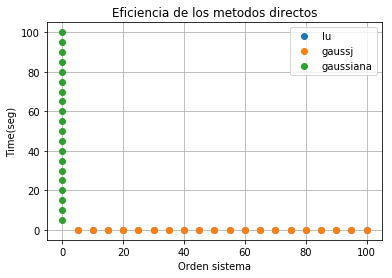

In [40]:
"""
Analisis de eficiencia del los metodos (gaussiana con pivoteo, lu, gauss-jordan)

vamos a generar MAX_ITERATIONS=100 sistemas cuyo orden crecera en 5 por cada iteracion y para cada iteracion vamos
a calcular el tiempo que emplea cada metodo para resolver la serie de sistemas generados.
Luego graficaremos el tiempo empleado por los metodos respecto al orden del sistema
"""
import numpy as np
import matplotlib.pyplot as plt
import time


MAX_ITERATIONS = 20
L = 10000
U = 100000

osis = np.array([5*(k+1) for k in range(MAX_ITERATIONS)]) # orden de los sistemas a crear
sistemas = [busca_sistema(orden, L, U) for orden in osis]

# tiempo empleados por los metodos(lu, gauss-jordan, gaussiana) para resolver el conjunto de sistemas generados
tlu = np.zeros_like(osis)
tgaussj = np.zeros_like(osis)
tgaussiana = np.zeros_like(osis)

for i, (A, b) in enumerate(sistemas):
    # calcula el tiempo que toma resolver el sistema Ax=b con el metodo lu
    tlu[i] = time.time()
    solvelu(A, b)
    tlu[i] = time.time() - tlu[i]
    
    # calcula el tiempo que toma resolver el sistema Ax=b con el metodo gauss-jordan
    tgaussj[i] = time.time()
    solve_gaussj(A,b)
    tgaussj[i] = time.time()-tgaussj[i]
    
    
    # calcula el tiempo que toma resolver el sistema Ax=b con el metodo eliminacion gaussiana con pivoteo
    tgaussiana[i] = time.time()
    solve_gaussiana_pivote(A, b)
    tgaussiana[i] = time.time()-tgaussiana[i]
    
    
    

# grafica tiempo vs orden del sistema

plt.plot(osis, tlu, 'o', label='lu')
plt.plot(osis, tgaussj,'o', label='gaussj')
plt.plot(tgaussiana, osis, 'o', label='gaussiana')
plt.title("Eficiencia de los metodos directos")
plt.ylabel("Time(seg)")
plt.xlabel("Orden sistema")
plt.legend()
plt.grid()
plt.show()

### Resolucion del sistema (I-A)x = d

Para cada método (gauss-jordan, eliminacion gaussiana con pivote, lu) se desarrollara lo siguiente: 
* Resolucion del sistema 
* Calculo de la condicional de la matrix $B = I-A$
* Calculo del error relativo

Finalmente se compara la rapidez de convergencia a la solucion exacta de cada metodo.
* Grafica (comparativa entre métodos) del vector resto respecto al numero de iteraciones de refinamiento iterativo.


In [42]:
import numpy as np


A = np.array([[8.04411657e-04, 1.66983660e-03, 4.17006102e-03, 3.92848931e-03,
        7.04645496e-03, 3.91197768e-03, 6.67480690e-03, 2.79508803e-03,
        2.22990408e-03, 6.97823920e-03, 4.33678963e-03, 7.43100852e-03,
        3.93985181e-03, 4.00524251e-03, 6.26144309e-03, 3.25852467e-04,
        3.15349399e-03, 5.04555795e-04, 1.35357205e-03, 6.99382935e-03],
       [2.04864259e-03, 7.27128167e-03, 6.41452566e-04, 6.19392264e-03,
        6.15321934e-03, 4.71903211e-04, 3.59093338e-03, 2.82185201e-03,
        8.56991596e-04, 1.34452803e-03, 3.35735583e-03, 3.68833039e-03,
        4.27109626e-03, 5.73995772e-03, 2.49194893e-03, 3.44445901e-03,
        4.09118764e-03, 2.03135769e-03, 6.79807534e-03, 5.07868401e-03],
       [5.87672919e-04, 4.38960775e-03, 4.60795943e-03, 2.23717545e-03,
        7.30269280e-03, 4.63825842e-03, 6.08457506e-03, 7.10584032e-03,
        2.55275656e-03, 6.42347089e-03, 7.16916712e-03, 6.92598616e-03,
        7.44320012e-03, 3.12082605e-03, 8.81388078e-04, 2.85653152e-03,
        3.74489197e-04, 6.26169138e-03, 3.83596291e-03, 1.42269702e-04],
       [7.98762564e-03, 7.05247819e-03, 7.47248135e-03, 1.67406519e-03,
        5.62945985e-03, 3.94921571e-03, 4.53273714e-03, 3.30875808e-03,
        5.15518898e-03, 7.42205011e-03, 5.06604511e-03, 7.28754521e-03,
        6.52293186e-03, 1.77064387e-03, 5.46471792e-03, 4.30901217e-03,
        4.93614544e-03, 6.26700266e-03, 2.93314995e-03, 5.99010293e-03],
       [5.91473213e-04, 7.61131303e-03, 1.82789290e-03, 2.89082149e-03,
        3.98217596e-03, 4.13656057e-03, 1.78640057e-03, 7.51838520e-03,
        3.41634853e-03, 4.31471198e-04, 2.12450084e-03, 3.03142521e-03,
        3.98349850e-03, 8.56551026e-04, 2.91179432e-03, 5.93272545e-03,
        7.26575960e-03, 3.96731122e-03, 3.09572290e-03, 4.74497206e-04],
       [4.07087708e-03, 7.27169982e-03, 2.92636972e-03, 1.86491580e-03,
        5.27902772e-03, 4.12774912e-03, 5.89166743e-03, 1.35691996e-03,
        6.80756348e-03, 7.49154906e-03, 9.75710399e-04, 4.61704451e-03,
        3.19674055e-03, 3.01969118e-03, 3.10737428e-03, 3.44276522e-03,
        1.83176082e-03, 2.99484542e-03, 4.75825617e-03, 2.34085984e-03],
       [7.88269778e-03, 8.59193026e-04, 5.28646381e-03, 1.21642647e-03,
        3.60231743e-03, 6.02518178e-03, 4.03540406e-03, 1.17240160e-05,
        5.63154712e-03, 1.54879435e-03, 7.32301084e-03, 3.16745141e-03,
        1.25157473e-04, 1.27444747e-03, 4.71873282e-03, 3.99888161e-04,
        2.41913480e-03, 2.70844522e-04, 1.95314374e-03, 5.70562060e-03],
       [7.76108413e-03, 2.17135844e-03, 1.31672500e-03, 3.81128931e-03,
        5.05658189e-03, 5.02004854e-03, 5.60031985e-03, 2.30625051e-04,
        3.84026569e-03, 3.71702981e-03, 2.57405504e-03, 6.05671972e-03,
        2.08940040e-03, 4.43829510e-03, 6.28396268e-03, 2.78031745e-03,
        4.89018859e-03, 2.61038865e-03, 6.99668765e-04, 7.27623472e-03],
       [7.71470791e-03, 6.19447797e-03, 3.24510055e-03, 4.85557406e-03,
        1.51927909e-03, 5.24749016e-03, 6.46264156e-03, 6.87182296e-03,
        3.27335153e-03, 1.42419893e-03, 3.00842631e-04, 5.11023644e-03,
        5.93095246e-04, 2.54443849e-03, 5.57369590e-03, 4.06959977e-03,
        7.03416004e-03, 4.62556134e-03, 6.49885563e-03, 7.09935353e-03],
       [2.51197502e-03, 7.62180113e-03, 7.25070873e-03, 2.33338078e-03,
        4.53225124e-04, 5.96562693e-04, 5.87562396e-03, 4.67156163e-03,
        3.77959154e-03, 3.70751209e-03, 4.23868969e-03, 4.92367750e-03,
        1.88722327e-03, 6.52834043e-03, 1.59152760e-03, 1.21099951e-03,
        3.54580409e-03, 2.66138580e-04, 6.25229062e-03, 5.22449257e-03],
       [5.05664027e-03, 1.77966725e-03, 6.97960304e-03, 6.68980538e-03,
        6.14040543e-03, 5.04558765e-03, 5.12662385e-03, 6.34416124e-03,
        3.23284987e-03, 5.69905847e-03, 1.53460688e-03, 3.08815830e-03,
        1.74363311e-03, 5.60092293e-03, 3.36801985e-03, 1.83599746e-03,
        3.67778794e-03, 6.96542953e-03, 3.01452537e-03, 9.93852002e-04],
       [6.99481564e-03, 6.31870740e-03, 4.29175044e-03, 7.51304941e-03,
        1.04953882e-03, 1.74854773e-03, 2.60100715e-03, 5.34540370e-03,
        4.57215146e-04, 7.00580753e-03, 7.27801217e-03, 3.97081116e-03,
        3.30436751e-03, 4.71941158e-03, 6.83768509e-03, 7.03341702e-03,
        6.65235069e-03, 3.10109100e-03, 4.14226337e-03, 2.72470794e-03],
       [4.72661427e-05, 6.19387130e-03, 6.58376701e-03, 1.65593049e-03,
        5.25684151e-03, 7.49742282e-03, 3.42107454e-03, 1.86505707e-05,
        4.94834131e-04, 3.54516496e-03, 9.71965406e-04, 5.41346795e-04,
        1.84427036e-03, 1.43861600e-03, 3.13265641e-03, 1.49243318e-03,
        9.75205910e-04, 2.89985852e-03, 3.57751036e-03, 3.87848181e-03],
       [5.49607939e-03, 5.67428139e-04, 3.04196553e-03, 2.15170719e-03,
        3.33220478e-03, 4.31235201e-03, 5.33438865e-03, 6.04143372e-03,
        1.14554342e-03, 3.94838595e-03, 8.00733329e-04, 2.93666824e-03,
        5.91244347e-04, 6.69993634e-03, 1.83499351e-03, 2.69668640e-03,
        1.71102665e-03, 5.40636188e-03, 1.98107807e-03, 5.04972417e-03],
       [7.23276661e-03, 3.75844577e-03, 5.22378441e-03, 8.11000633e-04,
        4.42875119e-03, 7.69082627e-03, 2.40981558e-03, 2.44630678e-03,
        8.61007357e-04, 5.23112688e-03, 5.92412372e-03, 1.39220873e-03,
        2.76379162e-03, 1.98805217e-03, 4.33564783e-03, 5.78389770e-03,
        1.61014446e-04, 1.48978125e-03, 4.07568457e-03, 4.19326104e-04],
       [3.28260105e-03, 5.99409966e-03, 5.18988066e-03, 3.35423772e-03,
        7.59196028e-04, 1.11066121e-04, 6.80048074e-03, 3.61619199e-04,
        7.15321783e-03, 3.96939291e-03, 1.87027178e-03, 6.80150467e-03,
        6.76324459e-03, 6.93119573e-03, 3.47782983e-04, 4.16203769e-03,
        6.44205081e-03, 7.19447414e-03, 9.28206898e-04, 1.51511425e-03],
       [3.07262906e-03, 3.57279499e-03, 4.39519796e-04, 2.98994261e-03,
        6.90437203e-03, 2.18452527e-03, 7.05915239e-04, 6.91730450e-03,
        6.13915514e-03, 7.51487981e-03, 1.46222184e-03, 7.71954340e-04,
        4.61142735e-03, 2.70000132e-03, 3.70079237e-03, 1.85291549e-03,
        6.28674341e-03, 1.06459613e-03, 4.97308272e-04, 6.25541164e-03],
       [5.37956111e-03, 3.30958767e-03, 2.23824409e-04, 2.02443450e-03,
        3.51203282e-03, 2.80452331e-03, 6.79466147e-03, 1.93514120e-03,
        4.06745127e-03, 8.20126182e-04, 1.54810444e-03, 6.75925668e-03,
        3.42020451e-03, 5.04713078e-03, 3.31264385e-03, 4.21679619e-03,
        5.04612586e-03, 7.34077667e-03, 5.43190169e-03, 1.55053720e-03],
       [5.46731936e-03, 1.94436872e-03, 4.02267391e-03, 3.24190006e-03,
        2.24988294e-03, 1.58750990e-03, 3.65624478e-03, 7.40794844e-03,
        3.96425627e-03, 5.56059572e-03, 4.57399018e-03, 2.98205792e-03,
        1.46649334e-03, 1.20829948e-03, 7.13753184e-03, 2.89452782e-04,
        3.52344962e-03, 4.79919747e-03, 1.93149038e-03, 1.05995127e-03],
       [1.71119989e-04, 3.53328733e-03, 3.55660851e-03, 4.75816056e-03,
        4.87744370e-03, 4.14596580e-03, 3.43022364e-03, 5.34508446e-03,
        4.20477771e-03, 5.08690714e-03, 5.95031043e-03, 6.37161536e-03,
        6.57471871e-03, 3.57066130e-03, 4.75554427e-03, 1.96297083e-03,
        3.61848417e-03, 3.04132691e-03, 4.27280177e-03, 9.88100101e-04]])

d = np.array([[10000.],
               [99000.],
               [36000.],
               [97000.],
               [45000.],
               [61000.],
               [82000.],
               [74000.],
               [34000.],
               [51000.],
               [79000.],
               [62000.],
               [42000.],
               [28000.],
               [71000.],
               [52000.],
               [58000.],
               [33000.],
               [31000.],
               [31000.]])

In [50]:
import numpy as np

# calcula la norma del maximo de la matriz A
def max_norm(A):    
    sum_row = sum(np.abs(A[0,:]))
    nrow = np.shape(A)[0]
    for i in range(1,nrow):
        s = sum(np.abs(A[i,:]))
        if s > sum_row:
            sum_row = s
    return sum_row

# calcula la condicional de la matriz A con la norma del maximo
def cond(A):    
    invA = sl.inv(A) 
    return max_norm(A)*max_norm(invA)

# Error relativo devido a la aplicacion del metodo "msolve"
def error_relativo(A, b, msolve):
    x0 = msolve(A, b)     # es la aproximacion de la solucion sel sistema Ax=b, por el metodo m 
    r = np.dot(A, x0) - b   #vector residuo
    cotsup = cond(A)*max_norm(r)/max_norm(b) # cota superior del error relativo
    cotinf = max_norm(r)/(cond(A)*max_norm(b)) # cota inferior del error relativo
    
    print("{} < Er < {}".format(cotinf, cotsup))


#refina la solucion obtenida por el metodo "msolve"
def refinamiento_iterativos(A, b, msolve, MAX_ITERATIONS=10):
    x0 = msolve(A, b)    # aproximacion de la solucion del sistema Ax=b
    invA =sl.inv(A)  #aproximacion de la inversa de A
    x = x0 # refinamiento de la solucion x0
    r = np.zeros(MAX_ITERATIONS) # almacena el vector residuo en cada refinamiento
    for k in range(MAX_ITERATIONS) :
        r[k] = max_norm(np.dot(A, x) -b)
        x=x0 + np.dot(invA,b-np.dot(A,x0))
        x0=x
    
    return x, r

## Analisis de error y eficiencia del método LU

In [51]:
nrow = np.shape(A)[0]

# Solucion del sistema (I-A)x = d mediante el metodo LU

x = solvelu(np.identity(nrow) - A, d)
print("Solucion aproximada obtenida por el metodo lu:\n{}".format(x))

# calculo de la condicional

print("cond(I-A)={}".format(cond(B)))

# Calculo del error relativo mediante el método LU
error_relativo(np.identity(nrow)-A, b, solvelu)

Solucion aproximada obtenida por el metodo lu:
[[ 14802.21702851]
 [103455.46407489]
 [ 41210.40135948]
 [102906.46705082]
 [ 49405.30899637]
 [ 65487.46553982]
 [ 85458.68621702]
 [ 78393.73212846]
 [ 39323.72919291]
 [ 55453.7568567 ]
 [ 83825.2590558 ]
 [ 67780.02426033]
 [ 45343.30324278]
 [ 31479.48001009]
 [ 74892.81872335]
 [ 56541.38453128]
 [ 62008.819348  ]
 [ 37155.06620476]
 [ 35097.77540939]
 [ 36007.61055507]]
cond(I-A)=1.2262588199174322


ValueError: Input b has to have same number of rows as input a

## Analisis de error y eficiencia del método gauss-jordan

In [53]:
nrow = np.shape(A)[0]
B = np.identity(nrow) - A

# Solucion del sistema (I-A)x = d mediante el metodo de gauss-jordan

x = solve_gaussj(B, d)
print("Solucion aproximada obtenida por el metodo de gauss-jaordan:\n{}".format(x))
# calculo de la condicional

print("cond(I-A)={}".format(cond(B)))

# Calculo del error relativo mediante el método de gauss-jordan
error_relativo(B, b, solve_gaussj)

Solucion aproximada obtenida por el metodo de gauss-jaordan:
[[ 14802.21702851]
 [103455.46407489]
 [ 41210.40135948]
 [102906.46705082]
 [ 49405.30899637]
 [ 65487.46553983]
 [ 85458.68621702]
 [ 78393.73212846]
 [ 39323.72919291]
 [ 55453.7568567 ]
 [ 83825.2590558 ]
 [ 67780.02426033]
 [ 45343.30324278]
 [ 31479.48001009]
 [ 74892.81872335]
 [ 56541.38453128]
 [ 62008.819348  ]
 [ 37155.06620476]
 [ 35097.77540939]
 [ 36007.61055507]]
cond(I-A)=1.2262588199174322


ValueError: shapes (20,20) and (100,) not aligned: 20 (dim 1) != 100 (dim 0)

## Analisis de error y eficiencia del método de eliminacion gaussiana con pivoteo

In [54]:
nrow = np.shape(A)[0]
B = np.identity(nrow) - A

# Solucion del sistema (I-A)x = d mediante el metodo de eliminacion gaussiana con pivoteo

x = solve_gaussiana_pivote(B, d)
print("Solucion aproximada obtenida por el metodo de eliminacion gaussiana con pivoteo:\n{}".format(x))

# calculo de la condicional

print("cond(I-A)={}".format(cond(B)))

# Calculo del error relativo mediante el método de eliminacion gaussiana con pivoteo
error_relativo(B, b, solve_gaussiana_pivote)

Solucion aproximada obtenida por el metodo de eliminacion gaussiana con pivoteo:
[[ 14802.21702851]
 [103455.46407489]
 [ 41210.40135948]
 [102906.46705082]
 [ 49405.30899637]
 [ 65487.46553982]
 [ 85458.68621702]
 [ 78393.73212846]
 [ 39323.72919291]
 [ 55453.7568567 ]
 [ 83825.2590558 ]
 [ 67780.02426033]
 [ 45343.30324278]
 [ 31479.48001009]
 [ 74892.81872335]
 [ 56541.38453128]
 [ 62008.819348  ]
 [ 37155.06620476]
 [ 35097.77540939]
 [ 36007.61055507]]
cond(I-A)=1.2262588199174322


ValueError: shapes (20,20) and (100,) not aligned: 20 (dim 1) != 100 (dim 0)

### Comparación de la rapidez de convergencia a la solución exacta

In [ ]:
metodos = [solvelu, solve_gaussj, solve_gaussiana_pivote]

# x[1],r[:,1]: solucion refinada y vector residuo generado por el metodo LU
# x[2],r[:,2]: solucion refinada y vector residuo generado por el metodo gauss-jordan
# x[3],r[:,3]: solucion refinada y vector residuo generado por el metodo eliminacion gaussiana con pivoteo


x = np.zeros(3) 
r = np.zeros(3*MAX_ITERATIONS).reshape(MAX_ITERATIONS,3)


for k, metodo in enumerate(metodos):
    x[k], r[:,k] = refinamiento_iterativos(A, b, metodo)
    
#graficando la tendencia de r respecto al numero de refinamientos

plt.plot()
